In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import csv

In [2]:
#newton interpolating method
def ends_filler(columns):
    if  pd.api.types.is_numeric_dtype(columns):
        columns = first_filler(columns)
        columns = last_filler(columns)
    return columns

def first_filler(column):
    if pd.isnull(column.at[0]) or np.isnan(column.at[0]):
        size = len(column) -1
        first_valid_index = 0
        while first_valid_index <= size and (pd.isnull(column.at[first_valid_index]) or 
                                             np.isnan(column.at[first_valid_index])):
            first_valid_index += 1
        if first_valid_index > size:
            column.at[0] = 0.0
        else:
            column.at[0] = column.at[first_valid_index]
    return column
    
def last_filler(column):
    if pd.isnull(column.at[len(column) -1]) or np.isnan(column.at[len(column) -1]):
        last_valid_index = len(column) -1
        while last_valid_index >= 0 and (pd.isnull(column.at[last_valid_index]) or 
                                         np.isnan(column.at[last_valid_index])):
            last_valid_index -= 1
        if last_valid_index < 0:
            column.at[len(column) -1] = 0.0
        else:
            column.at[len(column) -1] = column.at[last_valid_index]
    return column
    
def neareast_four_indexes(column, start, end):
    index_list = [0] * 8
    index_list[3] = start
    index_list[4] = end
    for i in range(1,4):
        index_list[3 - i] = prev_valid_index(column, start - i + 1)
        index_list[4 + i] = next_valid_index(column, end + i -1)
    return index_list

def prev_valid_index(column, pos):
    prev_index = pos
    size = len(column) -1
    if pos > 0 and pos < size:
        prev_index -= 1
        while prev_index >= 0 and (pd.isnull(column.at[prev_index]) or np.isnan(column.at[prev_index])):
            prev_index -= 1
    return prev_index  

def next_valid_index(column, pos):
    next_index = pos
    size = len(column) -1
    if pos > 0 and pos < size:
        next_index += 1
        while next_index <= size and (pd.isnull(column.at[next_index]) or np.isnan(column.at[next_index])):
            next_index += 1
    return next_index

def interpolating_polynomial(nearest_indexes, nearest_values):
    coeffs = np.polyfit(nearest_indexes, nearest_values, len(nearest_indexes) - 1)
    return np.poly1d(coeffs)

def polynomial_filler(column):
    for i in range(4):
        column = ends_filler(column)
    size = len(column) -1
    nearest_values = []
    if column.isnull().any():
        for i, value in enumerate(column):
            if (i > 3 and i < size - 3) and (pd.isnull(value) or np.isnan(value) or (value == '')):
                start = prev_valid_index(column, i)
                end = next_valid_index(column, i)
                gap = list(range(start + 1, end))
                nearest_indexes = neareast_four_indexes(column, start, end)
                for index in nearest_indexes:
                    nearest_values.append(column.at[index])
                polynomial = interpolating_polynomial(nearest_indexes, nearest_values)
                for x in gap:
                    column.at[x] = polynomial(x)
                plot_polynomial(polynomial, nearest_indexes[0], nearest_indexes[len(nearest_indexes) - 1], 50, gap, nearest_indexes)

    return column

def plot_polynomial(polynomial, start, end, precision, interpolated_list, nearest_indexes):
    x = np.linspace(start, end, precision)
    y = polynomial(x)

    plt.figure()

    plt.plot(x, y)

    interpolated_x = interpolated_list  
    interpolated_y = polynomial(interpolated_x)
    plt.scatter(interpolated_x, interpolated_y, color='red')
    interpolated_x = nearest_indexes  
    interpolated_y = polynomial(interpolated_x)
    plt.scatter(interpolated_x, interpolated_y, color='green')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Polynomial Plot')

    plt.show()

In [3]:
def plot_column(df, column, color):
    plt.figure(figsize=(10, 6))
    plt.plot(df['Ano'], df[column], color=color)
    plt.xlabel('Ano')
    plt.ylabel(column)
    plt.title(f'{column}')
    plt.grid(True)
    plt.show()

In [4]:
df = pd.read_csv('pib_tocantins.csv')
df

,Ano,Tocantins - PIB - Estadual,Tocantins - PIB - Construção Civil,Tocantins - PIB - Per Capita,Tocantins - PIB - Preços de Mercado
0,1985,1.717829e-01,3.250185e+07,24.623817,6.898309e+08
1,1986,4.550278e-01,3.989209e+07,25.769106,7.376193e+08
2,1987,NaN,NaN,NaN,NaN
3,1988,1.120342e+01,4.400825e+07,25.300856,7.542969e+08
4,1989,6.226475e-01,2.626370e+03,7.906501,7.189658e+06
5,1990,1.826217e+01,2.736192e+03,7.480279,6.918219e+06
6,1991,1.095157e+02,2.367749e+03,7.612218,7.155729e+06
7,1992,1.069521e+03,2.293989e+03,7.606233,7.422702e+06
8,1993,2.492505e+04,2.938425e+03,7.592565,7.589308e+06
9,1994,6.629074e+05,3.658048e+03,7.616935,7.792361e+06


In [6]:
df = pd.read_csv('pib_tocantins.csv')
for i, column in enumerate(df.columns):
    if i > 1:
        df[column] = polynomial_filler(column)
df

AttributeError: 'str' object has no attribute 'isnull'

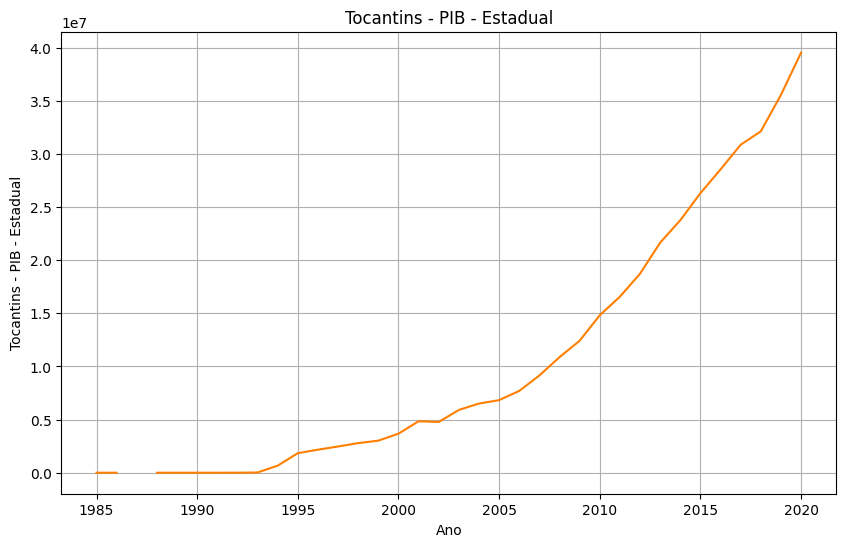

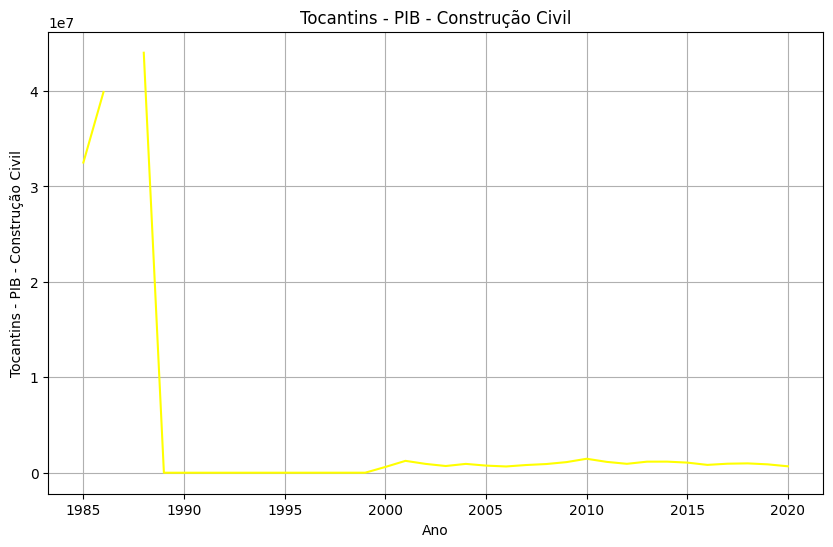

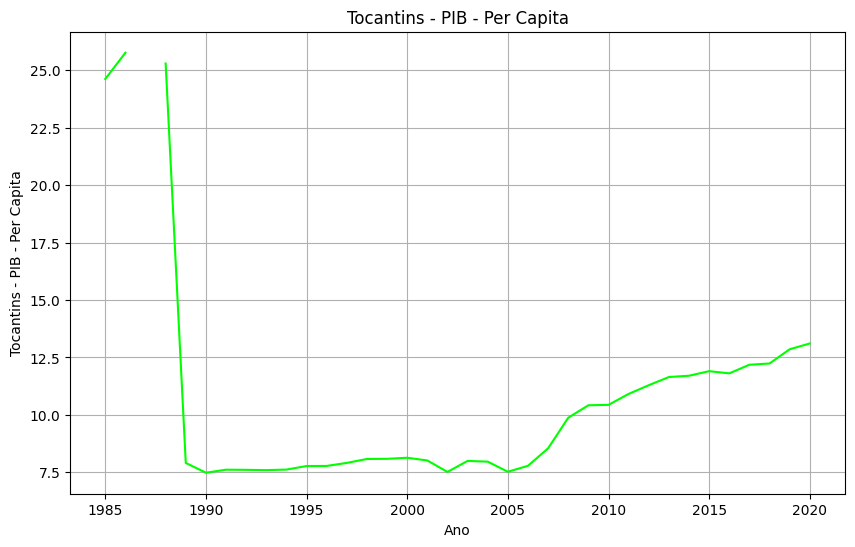

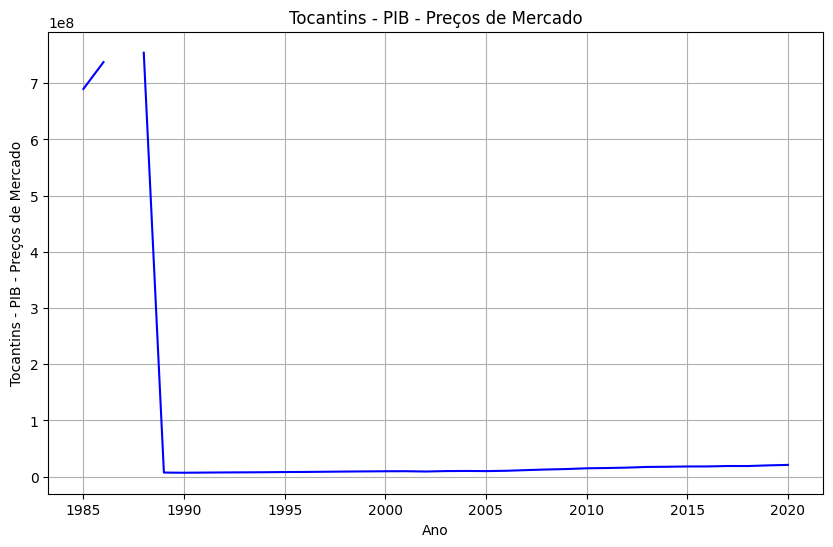

In [4]:
colors = ['#FF0000', '#FF7F00', '#FFFF00', '#00FF00', '#0000FF', '#4B0082', '#8B00FF', '#9400D3', '#FF00FF']
for i, column in enumerate(df.columns):
    if i > 0:
        plot_column(df, column, color=colors[i])